In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

%pylab inline
import pandas as pd
plt.style.use('ggplot')

import seaborn as sns
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_file='https://pix-ml-public.s3.amazonaws.com/assessment-data/data.tsv'

df = pd.read_csv(data_file, sep='\t')
df.head(10)

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,0.000010,0.390794,-1,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,0.000010,0.059600,423858,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,0.000183,0.149706,8879,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,0.000094,0.154785,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,0.000032,0.037583,-1,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072
5,4,93907,17686799,0,-1,-1,0,1,-1,-1,0.000186,0.267100,262565,30763035,9068207,9107790,29196072,32440044,1973606,2687461,29841067,21091108
6,4,19923387,31772643,0,-1,-1,0,0,-1,-1,0.000035,0.087070,179666,30763035,9312274,5028397,29196072,32440044,32440041,14074087,29196072,21091108
7,4,28451570,20843295,0,-1,-1,0,0,-1,-1,0.000035,0.336611,-1,138937,9312274,15403272,29196072,32440042,28928366,8556462,29196072,29196072
8,7,5588915,27491436,0,-1,-1,0,0,-1,-1,0.000074,0.216361,-1,138937,9312274,4281154,29196072,28928366,29196072,21857352,29196072,29196072
9,7,23074162,16184517,0,-1,-1,0,0,-1,-1,0.000013,0.004107,-1,28928366,26597095,7711526,29196072,3225250,1973606,17737135,9312274,29196072


In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',200)
pd.set_option('display.width', 3000)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
dtypes: float64(2), i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,16468027.0,1.315440e+06,7.697701e+05,0.000000e+00,6.428550e+05,1.283518e+06,1.965979e+06,2.671199e+06
uid,16468027.0,1.623759e+07,9.373752e+06,1.300000e+01,8.118035e+06,1.623691e+07,2.435890e+07,3.245875e+07
campaign,16468027.0,1.698396e+07,9.700053e+06,7.332200e+04,8.892341e+06,1.556893e+07,2.685234e+07,3.245211e+07
conversion,16468027.0,4.895523e-02,2.157745e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
conversion_timestamp,16468027.0,9.494022e+04,4.789667e+05,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.262888e+06
conversion_id,16468027.0,7.938852e+05,4.064784e+06,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.245852e+07
attribution,16468027.0,2.686563e-02,1.616907e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
click,16468027.0,3.611582e-01,4.803363e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
click_pos,16468027.0,-8.312659e-01,1.532221e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.730000e+02
click_nb,16468027.0,-6.626017e-01,2.696254e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.740000e+02


**No Outliers detected. **
As it is seen in the output of describe function. Columns which have real continous data are 'cost', 'cpo','click','click_pos', 'click_nb' and their gap between min and mx values are reasonable.

In [7]:
df['day'] = np.floor(df.timestamp / 86400.).astype(int)

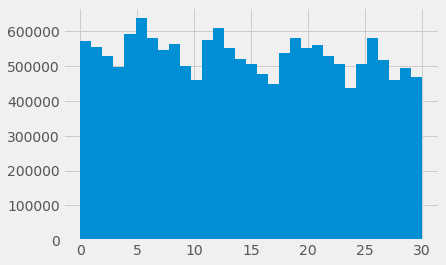

In [8]:
df.day.hist(bins=len(df.day.unique()))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
 22  day             

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

**No missing Values detected**

In [11]:
missing_values_table(df)

Your selected dataframe has 23 columns.
There are 0 columns with missing values.


,Missing Values,% of Total Values


In [12]:
df_corr = df.corr()
df_corr
#Because of the reason I said above it doesn't make sense to see the output of correlation between 
#the features but i just wanted to run and visualize it.

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,day
timestamp,1.000000,3.374972e-04,-5.300950e-03,0.002116,0.080433,0.001721,0.001168,0.016169,0.002906,0.003958,0.017048,0.045307,-0.018537,-0.011829,-0.016699,0.008717,0.042890,0.028324,-0.017428,-0.011408,-0.015327,0.011417,0.999693
uid,0.000337,1.000000e+00,-6.217599e-07,-0.000751,-0.000852,-0.000689,-0.000005,-0.000409,-0.002773,-0.003657,-0.001304,-0.000214,0.000158,0.000336,-0.000760,0.000337,-0.000007,0.000410,-0.000293,-0.000590,0.000043,-0.000382,0.000344
campaign,-0.005301,-6.217599e-07,1.000000e+00,0.001362,0.003394,0.000841,-0.003214,0.001080,0.004566,0.005566,0.011172,-0.076178,0.004506,0.011582,0.009912,-0.069514,0.008123,-0.108513,-0.004394,-0.004170,0.008225,-0.010788,-0.005233
conversion,0.002116,-7.513369e-04,1.362313e-03,1.000000,0.873676,0.860839,0.732341,0.301750,0.485381,0.551548,0.183310,-0.164742,-0.005749,0.075522,0.017791,-0.020328,-0.199382,-0.027388,0.019646,0.040488,0.010562,-0.057923,0.002368
conversion_timestamp,0.080433,-8.520631e-04,3.393769e-03,0.873676,1.000000,0.752320,0.582083,0.263632,0.424044,0.537344,0.159069,-0.129957,-0.001045,0.068917,0.013244,-0.013818,-0.130897,-0.020454,0.015716,0.031660,0.008649,-0.054261,0.080618
conversion_id,0.001721,-6.890481e-04,8.409590e-04,0.860839,0.752320,1.000000,0.630946,0.259758,0.417214,0.474576,0.156451,-0.141873,-0.004970,0.065140,0.015450,-0.017468,-0.170904,-0.023658,0.017307,0.035144,0.009190,-0.049751,0.001936
attribution,0.001168,-4.574569e-06,-3.213977e-03,0.732341,0.582083,0.630946,1.000000,0.220984,0.379766,0.429605,0.146847,-0.134937,-0.007989,0.053425,0.023489,-0.023605,-0.172303,-0.017725,0.011080,0.030601,0.007947,-0.044531,0.001339
click,0.016169,-4.085693e-04,1.080312e-03,0.301750,0.263632,0.259758,0.220984,1.000000,0.146464,0.166429,0.186409,-0.079034,-0.029461,0.053087,-0.019311,-0.004591,-0.015615,-0.034422,0.041381,0.030109,0.025637,-0.074932,0.016183
click_pos,0.002906,-2.773346e-03,4.565683e-03,0.485381,0.424044,0.417214,0.379766,0.146464,1.000000,0.871727,0.144134,-0.069704,-0.020337,0.046249,0.003499,-0.003255,-0.051338,-0.020537,0.011614,0.012930,0.008710,-0.053176,0.003111
click_nb,0.003958,-3.656980e-03,5.565647e-03,0.551548,0.537344,0.474576,0.429605,0.166429,0.871727,1.000000,0.154974,-0.079447,-0.021301,0.050137,0.003581,-0.003137,-0.074924,-0.022673,0.012856,0.015114,0.009900,-0.057031,0.004181


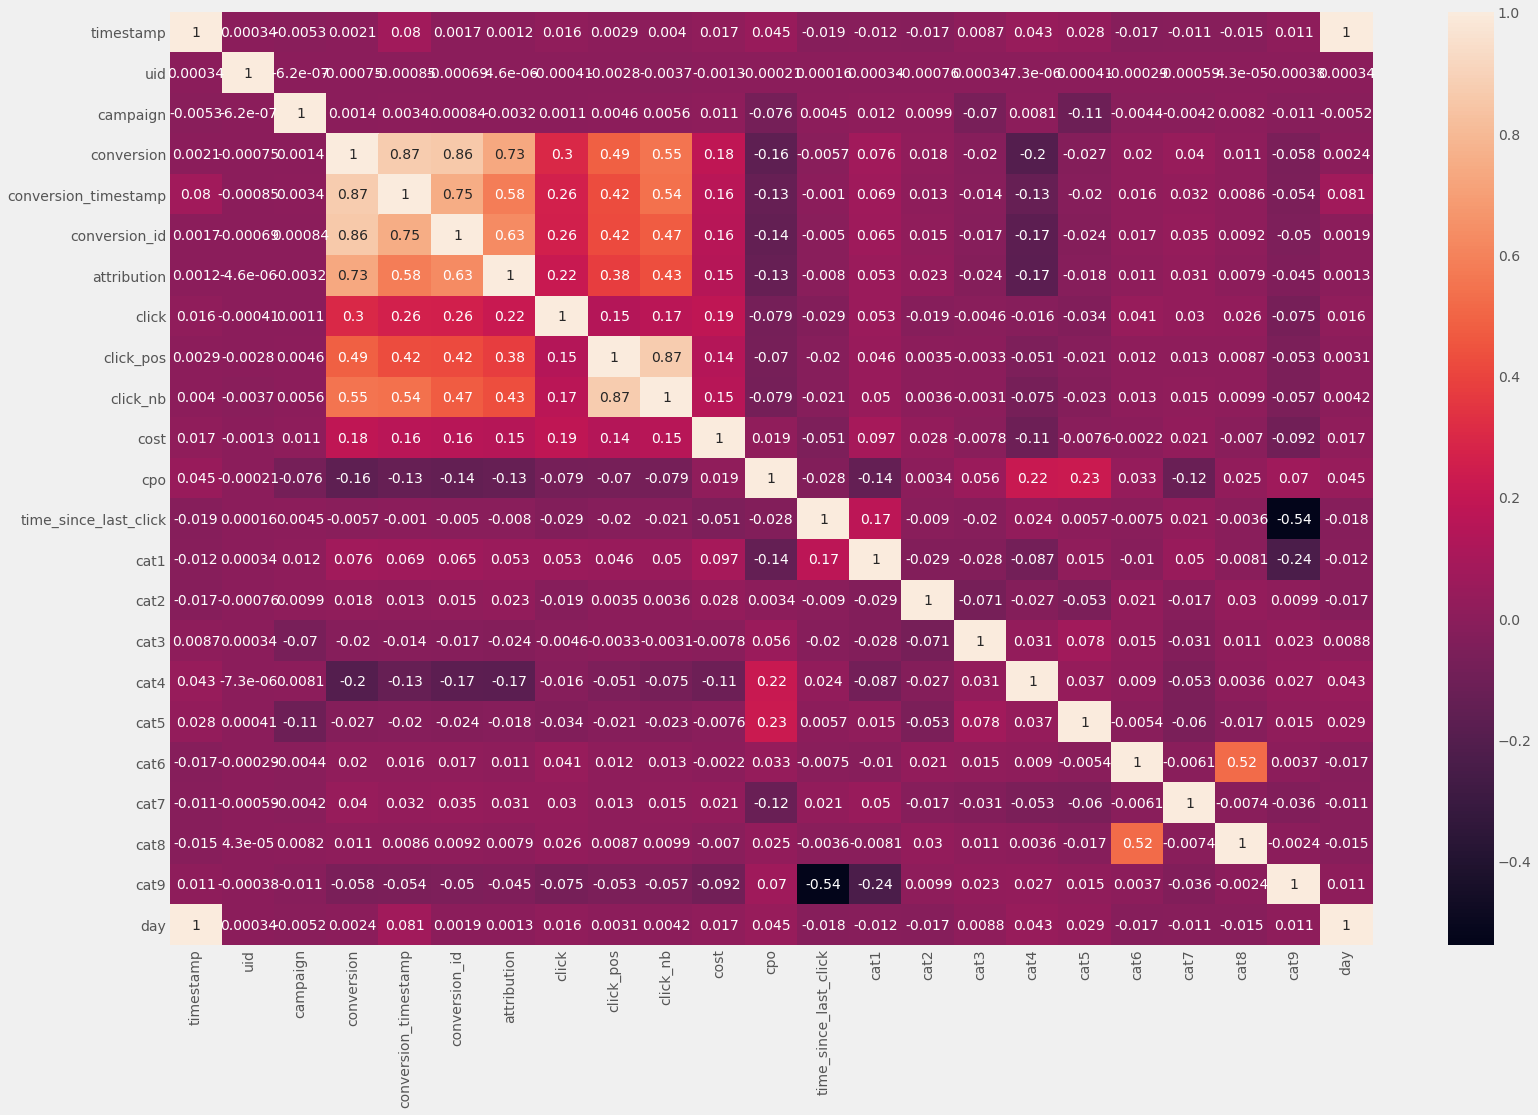

In [ ]:
plt.rcParams['figure.figsize'] = (24, 16)
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True);

In [13]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
 22  day             

In [14]:
cols = ['campaign','cat1', 'cat2', 'cat3','cat4','cat5', 'cat6','cat7', 'cat8', 'cat9']
df[cols] = df[cols].astype('category')
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   timestamp              int64   
 1   uid                    int64   
 2   campaign               category
 3   conversion             int64   
 4   conversion_timestamp   int64   
 5   conversion_id          int64   
 6   attribution            int64   
 7   click                  int64   
 8   click_pos              int64   
 9   click_nb               int64   
 10  cost                   float64 
 11  cpo                    float64 
 12  time_since_last_click  int64   
 13  cat1                   category
 14  cat2                   category
 15  cat3                   category
 16  cat4                   category
 17  cat5                   category
 18  cat6                   category
 19  cat7                   category
 20  cat8                   category
 21  cat9                   catego

In [15]:
cols2 = ['timestamp', 'uid', 'conversion','conversion_timestamp','conversion_id','time_since_last_click']
cols3=['attribution','click','click_pos','click_nb','day']
cols4=['cost','cpo']
df[cols2] = df[cols2].astype('int32')
df[cols4] = df[cols4].astype('float32')
df[cols3] = df[cols3].astype('int8')
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   timestamp              int32   
 1   uid                    int32   
 2   campaign               category
 3   conversion             int32   
 4   conversion_timestamp   int32   
 5   conversion_id          int32   
 6   attribution            int8    
 7   click                  int8    
 8   click_pos              int8    
 9   click_nb               int8    
 10  cost                   float32 
 11  cpo                    float32 
 12  time_since_last_click  int32   
 13  cat1                   category
 14  cat2                   category
 15  cat3                   category
 16  cat4                   category
 17  cat5                   category
 18  cat6                   category
 19  cat7                   category
 20  cat8                   category
 21  cat9                   catego

In [17]:
#df['last_click'] = df.attribution * (df.click_pos == df.click_nb - 1).astype(int)
#df['first_click'] = df.attribution * (df.click_pos == 0).astype(int)
#df.tail(20)

In [18]:
df.nunique()


timestamp                2455294
uid                      6142256
campaign                     675
conversion                     2
conversion_timestamp      407345
conversion_id             435811
attribution                    2
click                          2
click_pos                    175
click_nb                     107
cost                     8139200
cpo                       628937
time_since_last_click    1870062
cat1                           9
cat2                          70
cat3                        1829
cat4                          21
cat5                          51
cat6                          30
cat7                       57196
cat8                          11
cat9                          30
day                           31
dtype: int64

In [25]:


test_days=range(22,29)
test_day=23
learning_duration=21
df_test = df[df.day == test_day]
df_train = df[(df.day >= test_day - learning_duration) & (df.day < test_day)]

y_train=df_train['cost']
y_test=df_test['cost']

df_train.drop(['uid','cost'],axis=1)
df_test.drop(['uid','cost'],axis=1)

,timestamp,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,day
12496223,1987200,15422821,0,-1,-1,0,0,-1,-1,0.122310,472362,25259032,9312274,28254485,29196072,5824238,1973606,18041921,3225256,8661623,23
12496224,1987201,28137208,0,-1,-1,0,0,-1,-1,0.194904,903449,138937,26597095,29562678,29196072,32440047,1973606,31084796,26597096,8661620,23
12496225,1987201,30491418,0,-1,-1,0,0,-1,-1,0.265976,1288,27093701,26597095,4564247,29196072,5824237,29196072,18919433,29196072,32145478,23
12496226,1987201,26852339,0,-1,-1,0,0,-1,-1,0.317604,625572,27093701,26597095,16803941,29196072,26611392,1973606,7477605,3225256,8661623,23
12496227,1987201,2576437,1,3125229,19039846,1,1,3,7,0.110085,256299,25259032,26597095,28551369,29196072,32440044,1973606,14761535,29841067,21091108,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003010,2073597,6886825,0,-1,-1,0,0,-1,-1,0.107564,-1,1973606,26597093,12380200,29196072,11409684,1973606,10114589,32440044,29196072,23
13003011,2073597,6686704,0,-1,-1,0,0,-1,-1,0.193918,366316,25259032,26597095,21584517,29196072,32440044,1973606,2687461,3225256,21091111,23
13003012,2073599,17686799,0,-1,-1,0,0,-1,-1,0.298457,-1,138937,9068207,9107790,29196072,32440044,30763035,11871047,29196072,29196072,23
13003013,2073599,22419532,0,-1,-1,0,0,-1,-1,0.365106,-1,1973606,9312274,3539494,29196072,5824241,1973606,13118749,26597096,29196072,23


In [20]:
df_train.shape

(11395841, 23)

In [21]:
y_train.shape

(11395841,)

In [26]:

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
regr_1 = DecisionTreeRegressor(max_depth=5,min_samples_split=2)
regr_2 = DecisionTreeRegressor(max_depth=5,min_samples_split=4)
regr_1.fit(df_train, y_train)
regr_2.fit(df_train, y_train)

y_1 = regr_1.predict(df_test)
y_2 = regr_2.predict(df_test)


In [28]:
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_1))
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_2))
# The coefficient of determination: 1 is perfect prediction

print('Mean absolute error: %.4f'
      % mean_absolute_error(y_test, y_1))
print('Mean absolute error: %.4f'
      % mean_absolute_error(y_test, y_2))
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_1))
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_2))

Mean squared error: 0.0000
Mean squared error: 0.0000
Mean absolute error: 0.0002
Mean absolute error: 0.0002
Coefficient of determination: 0.8748
Coefficient of determination: 0.8748


In [30]:
regr_2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01117277, 0.        , 0.        ,
       0.98256505, 0.        , 0.00626217, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])